In [1]:

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import important library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("max_columns", None)
pd.set_option("max_rows", 200)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from utils import *

In [5]:
SEED = 8

In [6]:
INPUT_FILE = "concrete_wd_features.csv"
INPUT_DIR = "./"

In [7]:
df = read_input(INPUT_DIR, INPUT_FILE)

In [8]:
df.shape

(1030, 18)

In [19]:
# Separating dependent and independent variables
X = df.drop('strength',axis=1)
Y = df['strength']

In [20]:
features = X.columns.tolist()

In [21]:
# Splitting the data into train and test
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y , test_size=0.3, random_state=SEED)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [13]:
k =  KFold(random_state=SEED, n_splits=5)
# KFold will split the data in 5 equal parts

____________

### 2. Hyper Parameter Tuning *(15 marks)*

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

**Grid Search on Random Forest**

In [15]:
#['n_estimators', 'max_depth', 'min_samples_split']
#['n_estimators', 'max_depth', 'min_samples_split'] + ['learning_rate']

['n_estimators', 'max_depth', 'min_samples_split']

In [15]:
len(X)

1030

In [18]:
del df['b']

In [17]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,b,r_water_cement,r_coarseagg_fineagg,r_slag_cement,p_ash_water,agg_flag,slag_flag,ash_flag,superplastic_flag
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3.332205,29.89,"(192.0, 236.0]",1.440198,1.298330,1.500354,0.00,True,True,False,False
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,2.639057,23.51,"(22.0, 50.095]",0.937241,1.357448,0.249852,19676.69,True,True,True,True
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,3.332205,29.22,"(-0.001, 22.0]",0.749600,1.111124,0.000000,17934.18,True,False,True,True
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,3.332205,45.85,"(106.3, 128.5]",0.857143,1.391045,0.428571,0.00,True,True,False,False
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,3.332205,18.29,"(163.18, 185.755]",1.248708,1.503373,1.184755,0.00,True,True,False,True


In [22]:

rf = RandomForestRegressor(random_state=SEED,
                           n_jobs=-1)

params = {
    #'bootstrap': [True,False],
    'max_depth': [1,3,5,7,10,15,20,30],
    #'max_features': ['sqrt','log2'],
    #'min_samples_leaf': [1,3, 4],
    'min_samples_split': [5,30,50,100],
    'n_estimators': [10,25,100,200,300]
}    

grid = RandomizedSearchCV(rf,
                          params,
                          cv = k,
                          n_jobs=-1,
                          n_iter=30)

grid.fit(X,Y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=8, shuffle=False),
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=8),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 10, 15, 20,
                                                      30],
                                        'min_samples_split': [5, 30, 50, 100],
                                        'n_estimators': [10, 25, 100, 200,
                                                         300]})

In [23]:
grid.best_params_

{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 20}

In [24]:
grid_results = pd.DataFrame(grid.cv_results_)

In [25]:
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.275825,0.004847,0.022288,0.001606,100,100,1,"{'n_estimators': 100, 'min_samples_split': 100...",0.405726,0.349298,0.378335,0.313558,0.344414,0.358266,0.031389,30
1,0.121589,0.021625,0.023209,0.006878,25,30,15,"{'n_estimators': 25, 'min_samples_split': 30, ...",0.832607,0.870428,0.857754,0.879057,0.837294,0.855428,0.018102,5
2,0.797510,0.077784,0.039071,0.003539,200,30,5,"{'n_estimators': 200, 'min_samples_split': 30,...",0.813517,0.824246,0.841956,0.850799,0.801239,0.826351,0.018116,7
3,0.360669,0.154687,0.028231,0.003575,100,100,10,"{'n_estimators': 100, 'min_samples_split': 100...",0.741492,0.740331,0.744035,0.750569,0.694455,0.734176,0.020175,15
4,0.155540,0.057493,0.029756,0.012775,25,30,7,"{'n_estimators': 25, 'min_samples_split': 30, ...",0.829622,0.857974,0.856027,0.874726,0.833773,0.850425,0.016667,6
5,0.879005,0.055945,0.038936,0.001513,200,5,20,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.885503,0.930883,0.899812,0.933206,0.906235,0.911128,0.018365,1
6,0.036548,0.005293,0.011639,0.002531,10,50,3,"{'n_estimators': 10, 'min_samples_split': 50, ...",0.678896,0.644482,0.711674,0.716612,0.592235,0.668780,0.046216,23
7,0.033491,0.002593,0.008001,0.000541,10,5,3,"{'n_estimators': 10, 'min_samples_split': 5, '...",0.678622,0.649680,0.722587,0.736399,0.604053,0.678268,0.048309,21
8,0.728942,0.103752,0.037583,0.000872,200,30,3,"{'n_estimators': 200, 'min_samples_split': 30,...",0.689428,0.673591,0.730306,0.735611,0.625209,0.690829,0.040420,19
9,1.242637,0.188830,0.051253,0.001780,300,100,20,"{'n_estimators': 300, 'min_samples_split': 100...",0.739730,0.744522,0.746955,0.752165,0.701181,0.736911,0.018309,11


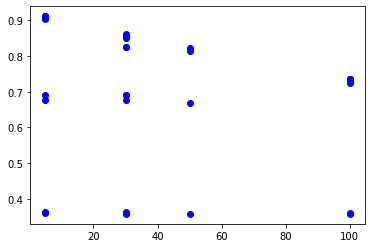

In [26]:
plt.plot(grid_results['param_min_samples_split'],
         grid_results['mean_test_score'],
        'bo')

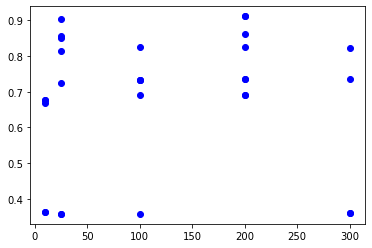

In [27]:
plt.plot(grid_results['param_n_estimators'],
         grid_results['mean_test_score'],
        'bo')

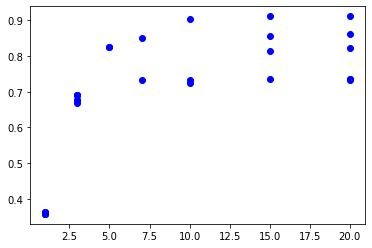

In [28]:
plt.plot(grid_results['param_max_depth'],
         grid_results['mean_test_score'],
        'bo')

In [29]:


rf = RandomForestRegressor(random_state=SEED,
                           n_jobs=-1)

params = {
    'max_depth': [13,15,17],
    'min_samples_split': [3,5,8],
    'n_estimators': [150,200,250]
}    

grid_search = GridSearchCV(rf,
                          params,
                          cv = k,
                          n_jobs=-1,
                          )

grid_search.fit(X,Y)


GridSearchCV(cv=KFold(n_splits=5, random_state=8, shuffle=False),
             estimator=RandomForestRegressor(n_jobs=-1, random_state=8),
             n_jobs=-1,
             param_grid={'max_depth': [13, 15, 17],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [150, 200, 250]})

In [ ]:
500*10=5000


30*5=150

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=2, cv = 10, n_iter=500)
rs.fit(X_train, y_train)

In [ ]:
R2_Square:
    
91.28567533489316

100% total_

In [30]:
grid_search.abest_score_

0.9128567533489316

In [31]:
grid_search.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 200}

In [32]:
final_model = grid_search.best_estimator_

In [33]:
import pickle

In [37]:
pickle.dump(final_model, open("concrete_model_v01.pk","wb"))

In [38]:
loaded_model = pickle.load(open("concrete_model_v01.pk","rb"))

In [40]:
loaded_model.predict(X)

array([29.31457951, 24.88124774, 28.81087401, ..., 44.19458549,
       54.57103333, 52.10149667])